In [1]:
#Importing The Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#Import the Dataset
company=pd.read_csv("/content/Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
#Data Exploration 
company.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [4]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company.shape

(400, 11)

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
#Feature Engineering We need to convert Sales column into categorical type 
company.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [9]:
company.Sales.max()

16.27

In [10]:
16.27/3

5.423333333333333

In [11]:
5.423333333333333*2

10.846666666666666

In [12]:
5.423333333333333*3

16.27

In [13]:
#Converting sales column into categorical column with labels low for 0 to 5.39,
# medium for 9.32 and High for 16.27
data=company.copy()
data['sales_cat']=pd.cut(data['Sales'],bins=[0,5.39,9.32,17],labels=['Low','Medium','High'],right = False)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [14]:
data.sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: sales_cat, dtype: int64

<Figure size 576x576 with 0 Axes>

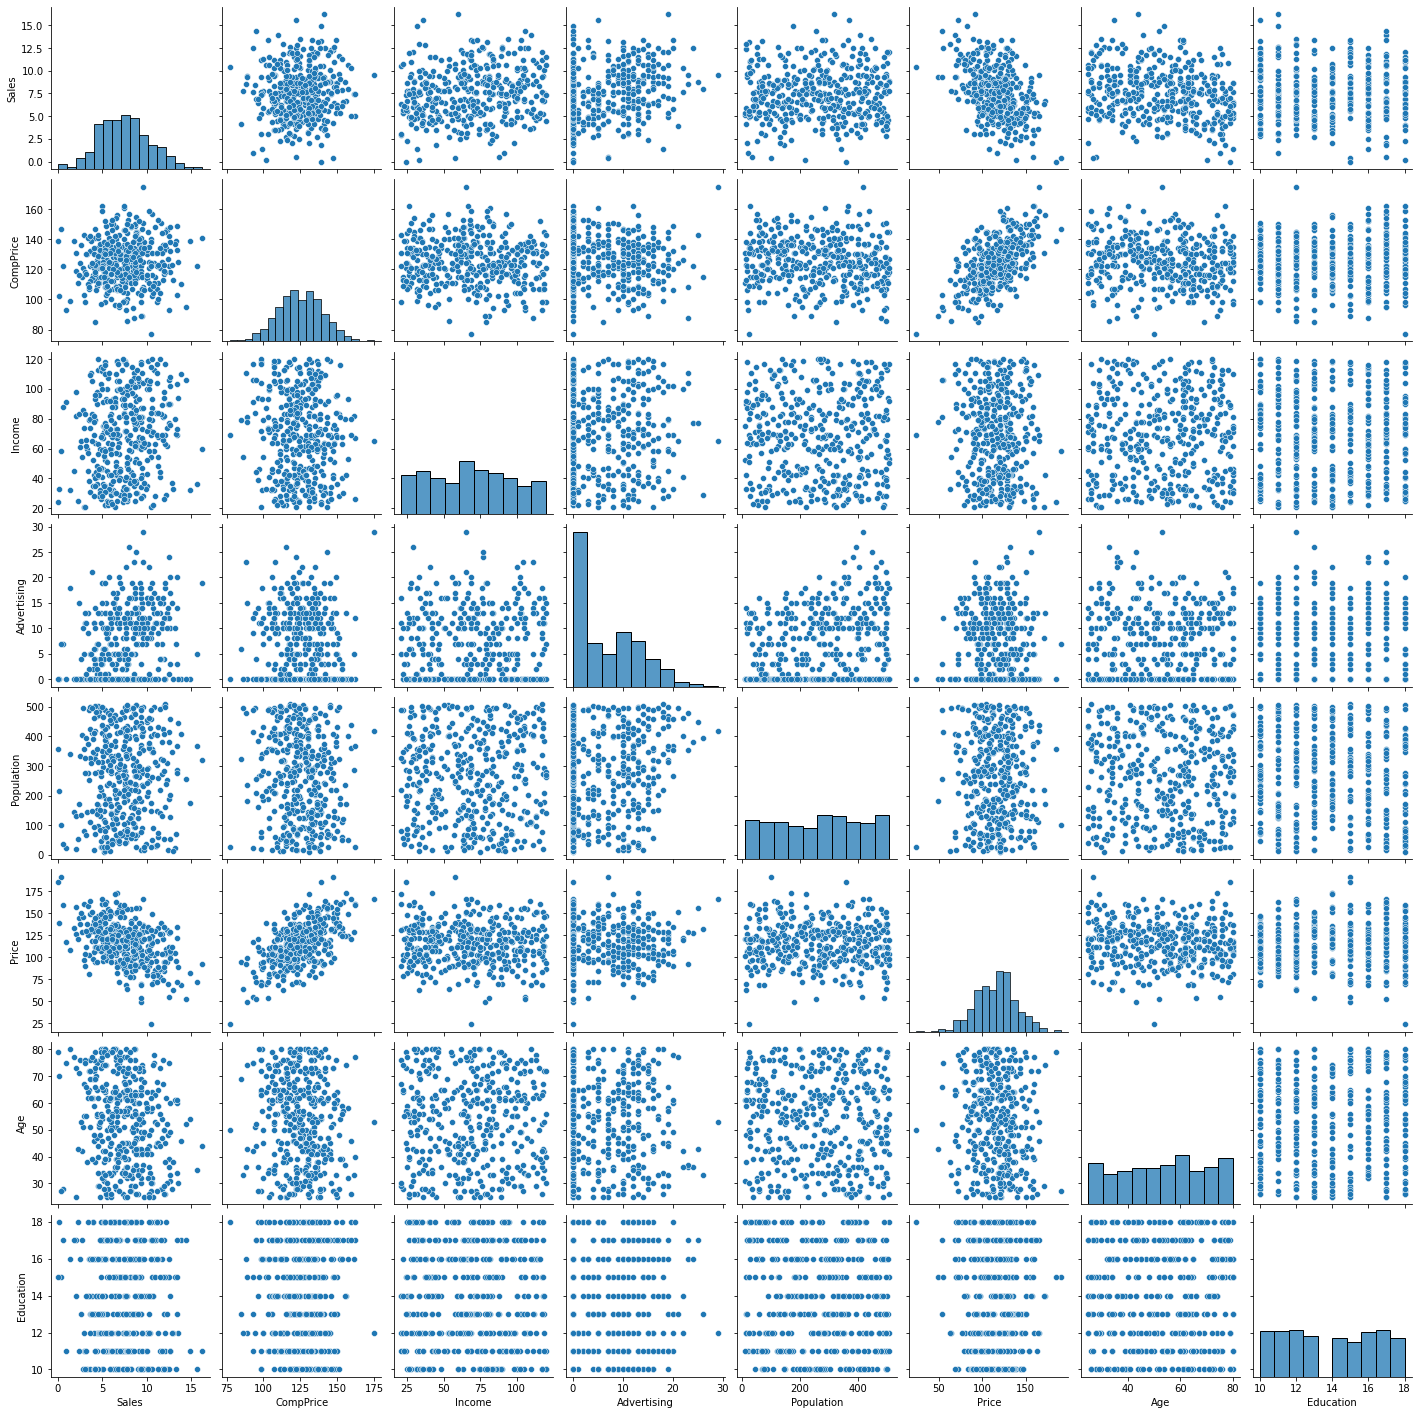

In [15]:
#Data Visualization 
plt.figure(figsize=(8,8))
sns.pairplot(data,palette='coolwarm')
plt.show()

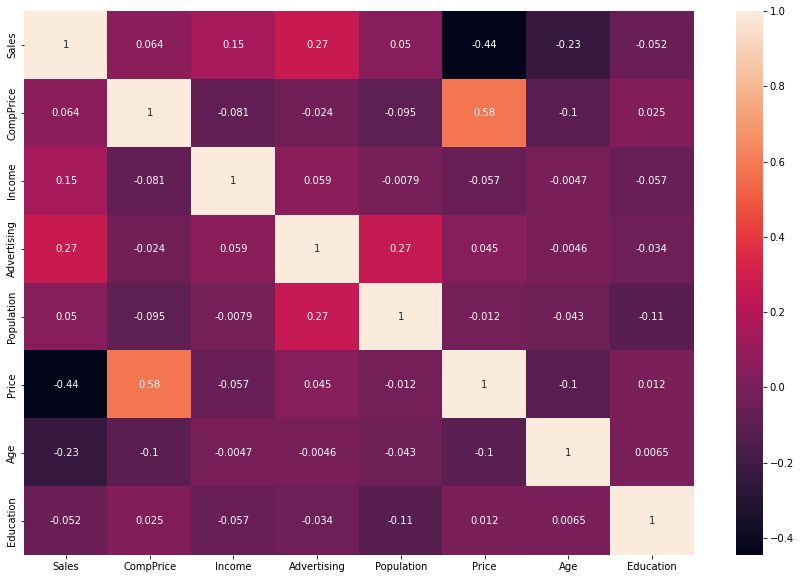

In [16]:
#Checking for Correlation between variables 
fig=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

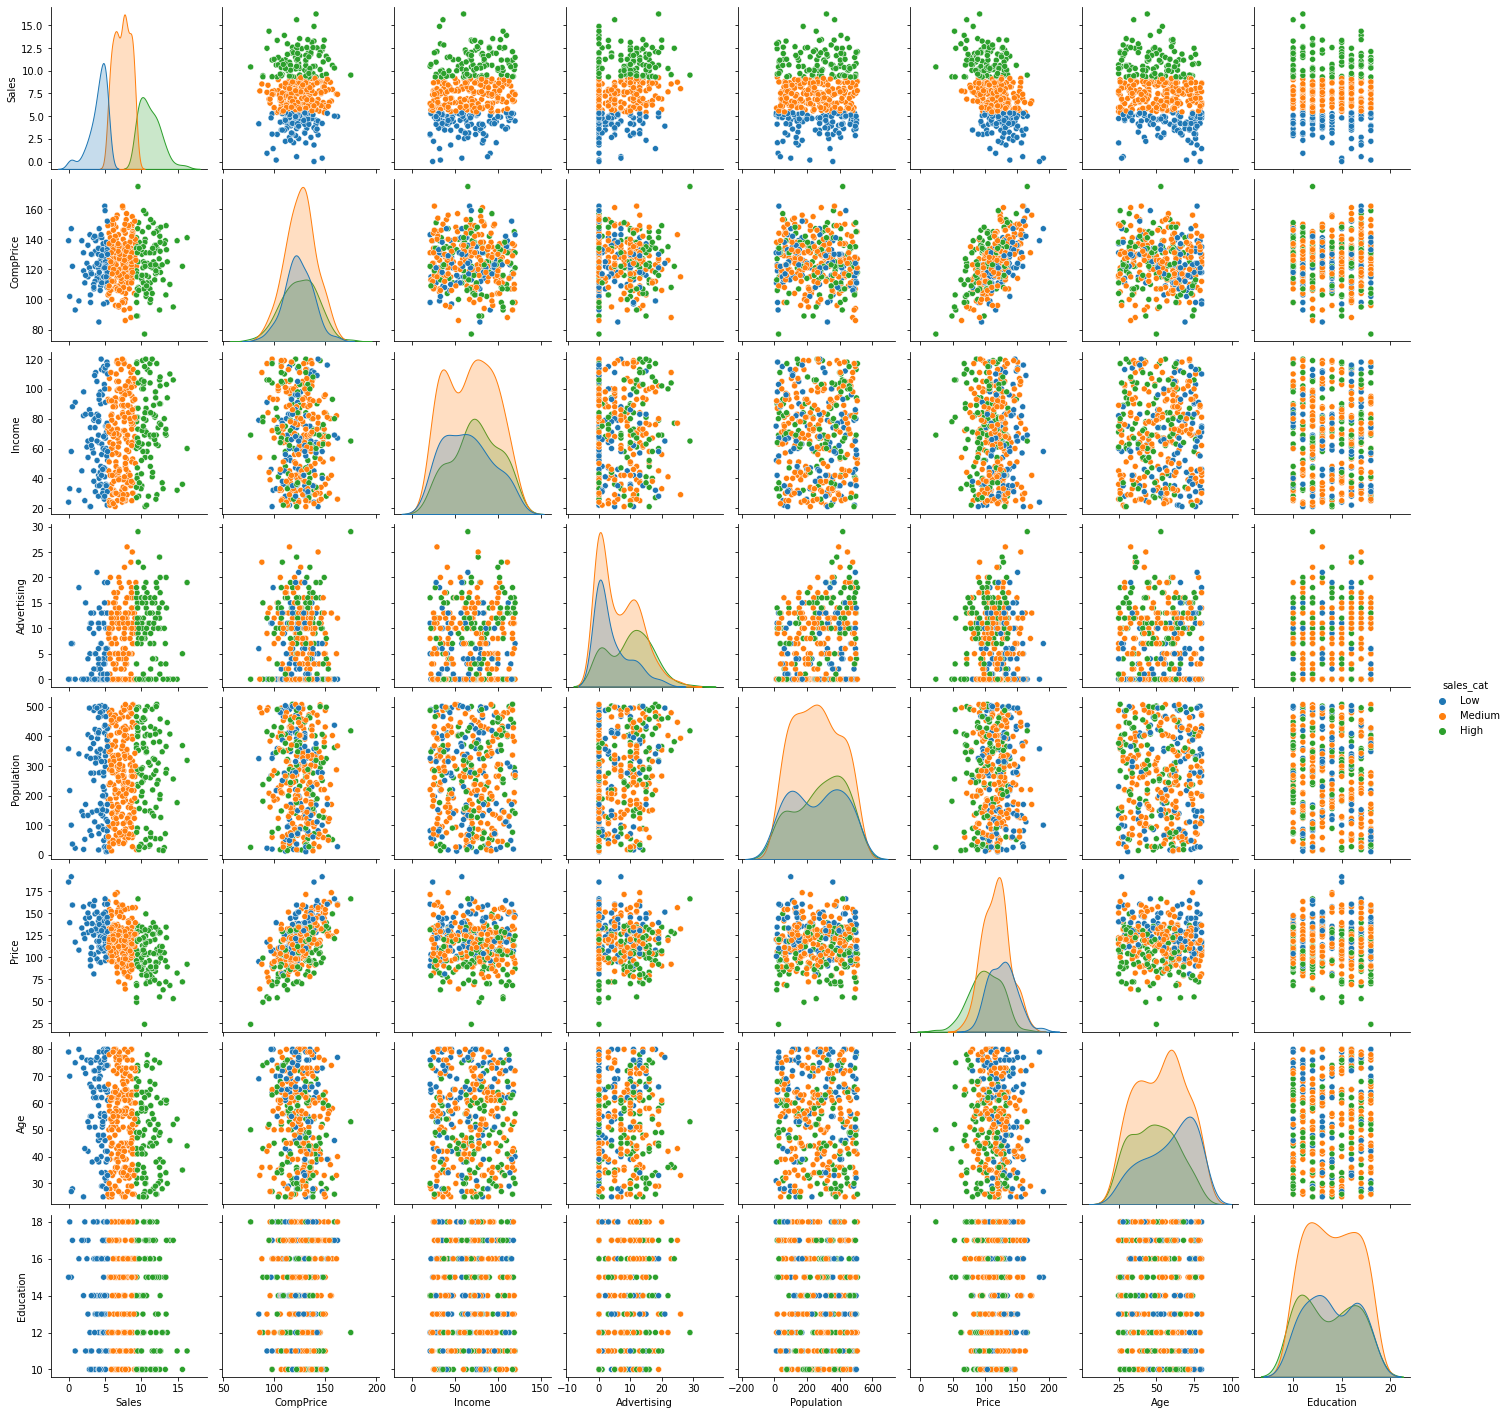

In [17]:
#Plot pair plot to visualization effects of sales category on other variables 
sns.pairplot(data=data,hue='sales_cat')

**DATA PRE-PROCESSING**

In [18]:
#Converting categorical columns from dataset into dummies leaving target variable which we will use labelencoder
data1=data.copy()
data1.drop('Sales',axis=1,inplace=True)
data1=pd.get_dummies(data1.iloc[:,:-1])
data1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [19]:
data1['sales']=data.sales_cat
data1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low


In [20]:
#Now converting our target variable sales into categorical dummies for further processing 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1["sales"]=le.fit_transform(data1["sales"])
data1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


In [21]:
data1['sales'].value_counts()

2    198
0    102
1    100
Name: sales, dtype: int64

In [22]:
#Splitting into Independent X and dependent Y variables
x=data1.iloc[:,:-1]
y=data1['sales']

In [23]:
#Splitting the data into train and test 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)

In [27]:
ytrain.value_counts()

2    130
0     77
1     73
Name: sales, dtype: int64

In [24]:
#Building the Decision Tree Classifier using Entropy criteria 
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

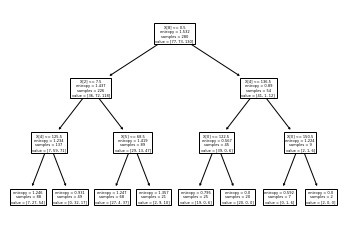

In [25]:
#Plot the Decision Tree without proper column and function names 
tree.plot_tree(model);

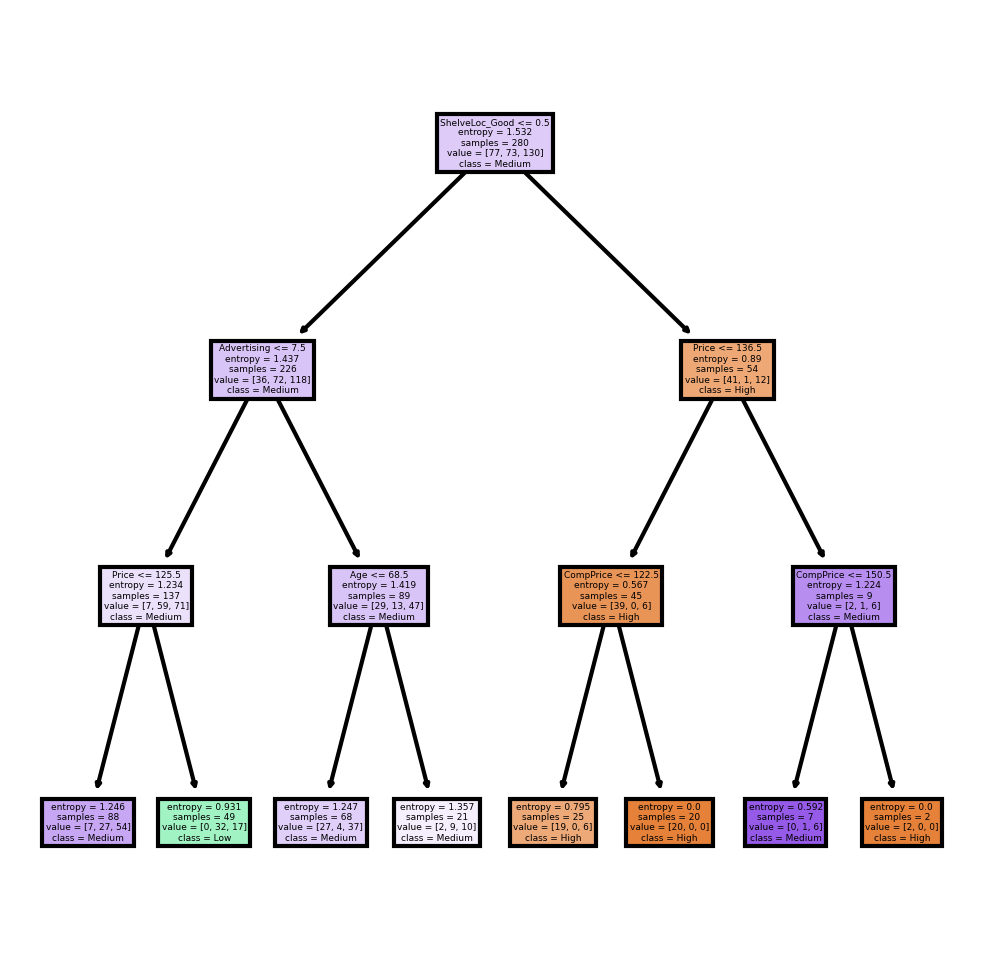

In [31]:
#Plotting the Decision Tree using proper variable functions and categories 
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad',
    'ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['High','Low','Medium']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [32]:
#Predicting on the Test Data 
ypred=model.predict(xtest) #Predicting on test dataset
pd.Series(ypred).value_counts() #Getting the count of each category

2    81
0    26
1    13
dtype: int64

In [33]:
#Displaying the 3 way table to understand the correct and wrong predictions 
pd.crosstab(ytest,ypred) 

col_0,0,1,2
sales,,,
0,12,0,13
1,0,8,19
2,14,5,49


In [34]:
#Display the model Accuracy
np.mean(ypred==ytest)

0.575

In [35]:
#Building Decision Tree Calssifier (CART) using Gini Criteria 
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [36]:
model_gini.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [39]:
#Predicting and computing the Model Accuracy 
pred=model_gini.predict(xtest)
np.mean(pred==ytest)

0.5916666666666667

In [40]:
#Displaying the 3 way table to understand the correct and wrong predictions 
pd.crosstab(ytest,pred) 

col_0,0,1,2
sales,,,
0,11,1,13
1,0,10,17
2,12,6,50


In [ ]:
#Hence the Accuracy is slighty improved in Gini Criteria 